In [1]:
import pandas as pd
import numpy as np

## Socioeconomic

In [3]:
df_socio = pd.read_csv("socioeconomic.csv")

In [5]:
df_socio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22692 entries, 0 to 22691
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   GEOID                             22692 non-null  int64  
 1   Geography                         22692 non-null  object 
 2   state                             22692 non-null  int64  
 3   county                            22692 non-null  int64  
 4   tract                             22692 non-null  int64  
 5   Total_Population                  22692 non-null  int64  
 6   Total_Households                  22692 non-null  int64  
 7   Median_Household_Income           22692 non-null  int64  
 8   Uninsured_Rate                    22692 non-null  float64
 9   Rent_as_Income_Percentage         22692 non-null  float64
 10  Limited_English_Proficiency_Rate  22692 non-null  float64
 11  No_Vehicle_Rate                   22692 non-null  float64
 12  No_I

In [60]:
unique_geoids = df_socio['GEOID'].dropna().unique()
print("Number of unique GEOID values:", len(unique_geoids))

Number of unique GEOID values: 22692


In [39]:
df_socio.isnull().sum()

GEOID                                0
Geography                            0
state                                0
county                               0
tract                                0
Total_Population                     0
Total_Households                     0
Median_Household_Income              0
Uninsured_Rate                       0
Rent_as_Income_Percentage            0
Limited_English_Proficiency_Rate     0
No_Vehicle_Rate                      0
No_Internet_Rate                     0
latitude                             0
longitude                            0
Common State County FIPS Code        0
HPSA Designation Date               24
HPSA Score                          24
HPSA Status Code                    24
dtype: int64

## Healthcare

In [6]:
df_hcare = pd.read_csv("healthcare.csv")

In [7]:
df_hcare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27210 entries, 0 to 27209
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TractFIPS               27210 non-null  int64  
 1   StateAbbr               27210 non-null  object 
 2   PlaceName               27210 non-null  object 
 3   ACCESS2_CrudePrev       27209 non-null  float64
 4   ARTHRITIS_CrudePrev     27210 non-null  float64
 5   BINGE_CrudePrev         27210 non-null  float64
 6   BPHIGH_CrudePrev        27210 non-null  float64
 7   BPMED_CrudePrev         27210 non-null  float64
 8   CANCER_CrudePrev        27210 non-null  float64
 9   CASTHMA_CrudePrev       27210 non-null  float64
 10  CHD_CrudePrev           27210 non-null  float64
 11  CHECKUP_CrudePrev       27210 non-null  float64
 12  CHOLSCREEN_CrudePrev    27210 non-null  float64
 13  COLON_SCREEN_CrudePrev  27191 non-null  float64
 14  COPD_CrudePrev          27210 non-null

In [34]:
df_hcare.duplicated().sum()

0

In [16]:
df_hcare.isnull().sum()

TractFIPS                    0
StateAbbr                    0
PlaceName                    0
ACCESS2_CrudePrev            1
ARTHRITIS_CrudePrev          0
BINGE_CrudePrev              0
BPHIGH_CrudePrev             0
BPMED_CrudePrev              0
CANCER_CrudePrev             0
CASTHMA_CrudePrev            0
CHD_CrudePrev                0
CHECKUP_CrudePrev            0
CHOLSCREEN_CrudePrev         0
COLON_SCREEN_CrudePrev      19
COPD_CrudePrev               0
COREM_CrudePrev            103
COREW_CrudePrev            109
CSMOKING_CrudePrev           0
DENTAL_CrudePrev             0
DIABETES_CrudePrev           0
HIGHCHOL_CrudePrev           0
KIDNEY_CrudePrev             0
LPA_CrudePrev                0
MAMMOUSE_CrudePrev          37
MHLTH_CrudePrev              0
OBESITY_CrudePrev            0
PAPTEST_CrudePrev         2202
PHLTH_CrudePrev              0
SLEEP_CrudePrev              0
STROKE_CrudePrev             0
TEETHLOST_CrudePrev         60
Geolocation                  0
dtype: i

In [17]:
df_hcare = df_hcare.dropna(axis=1)

In [18]:
df_hcare.isnull().sum()

TractFIPS               0
StateAbbr               0
PlaceName               0
ARTHRITIS_CrudePrev     0
BINGE_CrudePrev         0
BPHIGH_CrudePrev        0
BPMED_CrudePrev         0
CANCER_CrudePrev        0
CASTHMA_CrudePrev       0
CHD_CrudePrev           0
CHECKUP_CrudePrev       0
CHOLSCREEN_CrudePrev    0
COPD_CrudePrev          0
CSMOKING_CrudePrev      0
DENTAL_CrudePrev        0
DIABETES_CrudePrev      0
HIGHCHOL_CrudePrev      0
KIDNEY_CrudePrev        0
LPA_CrudePrev           0
MHLTH_CrudePrev         0
OBESITY_CrudePrev       0
PHLTH_CrudePrev         0
SLEEP_CrudePrev         0
STROKE_CrudePrev        0
Geolocation             0
dtype: int64

In [70]:
df_hcare.shape

(27210, 25)

In [69]:
# Identify duplicate
duplicates_in_hcare = df_hcare[df_hcare.duplicated(subset=['TractFIPS'], keep=False)]
duplicates_in_hcare

,TractFIPS,StateAbbr,PlaceName,ARTHRITIS_CrudePrev,BINGE_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CANCER_CrudePrev,CASTHMA_CrudePrev,CHD_CrudePrev,...,DIABETES_CrudePrev,HIGHCHOL_CrudePrev,KIDNEY_CrudePrev,LPA_CrudePrev,MHLTH_CrudePrev,OBESITY_CrudePrev,PHLTH_CrudePrev,SLEEP_CrudePrev,STROKE_CrudePrev,Geolocation
86,1073014302,AL,Birmingham,18.9,16.0,30.3,71.9,4.0,10.5,3.1,...,8.3,25.7,2.1,24.5,12.4,30.7,9.2,36.4,2.2,"(33.42446588290, -86.8841474217)"
87,1073014413,AL,Birmingham,17.8,18.4,23.5,70.7,5.1,8.3,3.1,...,6.1,26.3,1.8,19.6,10.0,21.7,7.3,30.8,1.6,"(33.42265931170, -86.8508620751)"
89,1117030303,AL,Birmingham,13.4,20.4,22.2,55.4,2.8,9.6,1.8,...,4.2,20.8,1.4,21.2,12.3,29.4,7.3,37.4,1.1,"(33.42586612390, -86.7138193560)"
98,1073014302,AL,Hoover,20.9,17.5,27.3,69.4,5.0,9.0,3.6,...,7.0,29.5,2.0,23.8,12.1,28.3,10.0,33.2,1.9,"(33.39237928670, -86.8833755105)"
106,1073014413,AL,Hoover,24.9,15.5,30.6,76.1,6.9,8.6,4.5,...,7.9,33.6,2.2,20.9,9.9,25.7,9.4,30.1,2.1,"(33.37339197610, -86.8534900912)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26438,53033029305,WA,Renton,22.7,15.3,27.4,68.0,6.9,9.0,5.1,...,9.0,31.6,2.9,17.2,11.4,21.1,11.0,31.2,2.8,"(47.42666529650, -122.207690001)"
26627,53063012200,WA,Spokane,20.5,19.1,25.0,64.3,5.1,11.3,4.6,...,7.7,28.7,2.5,21.3,15.6,29.5,12.7,33.5,2.5,"(47.67983542600, -117.326957399)"
26628,53063013401,WA,Spokane,24.6,16.3,28.1,71.9,7.5,10.0,5.1,...,8.0,33.1,2.7,16.7,11.3,26.7,11.0,29.8,2.6,"(47.61878531620, -117.342867658)"
26642,53063012200,WA,Spokane Valley,23.9,17.9,27.8,68.3,6.4,11.3,5.6,...,8.3,31.4,2.8,21.9,15.3,29.8,13.6,32.6,3.0,"(47.66849666520, -117.319916960)"


In [71]:
df_hcare = df_hcare.drop_duplicates(subset=['TractFIPS'], keep='first')

In [72]:
df_hcare.shape

(26968, 25)

## Healthcare Count

In [12]:
import geopandas as gpd

In [13]:
df_hcount = gpd.read_file("healthcarecount.geojson")

In [21]:
df_hcount["GEOID"] = pd.to_numeric(df_hcount["GEOID"], errors="coerce").astype("Int64")

In [22]:
df_hcount.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 84161 entries, 0 to 84160
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   GEOID            84161 non-null  Int64   
 1   clinic           84161 non-null  float64 
 2   dentist          84161 non-null  float64 
 3   doctors          84161 non-null  float64 
 4   hospital         84161 non-null  float64 
 5   nursing_home     84161 non-null  float64 
 6   pharmacy         84161 non-null  float64 
 7   social_facility  84161 non-null  float64 
 8   geometry         84161 non-null  geometry
dtypes: Int64(1), float64(7), geometry(1)
memory usage: 5.9 MB


In [26]:
df_hcount = df_hcount.drop(columns=["geometry"])

In [27]:
df_hcount = gpd.GeoDataFrame(df_hcount)

In [28]:
df_merged = df_socio.merge(df_hcount, on="GEOID", how="left")

In [29]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22692 entries, 0 to 22691
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   GEOID                             22692 non-null  int64  
 1   Geography                         22692 non-null  object 
 2   state                             22692 non-null  int64  
 3   county                            22692 non-null  int64  
 4   tract                             22692 non-null  int64  
 5   Total_Population                  22692 non-null  int64  
 6   Total_Households                  22692 non-null  int64  
 7   Median_Household_Income           22692 non-null  int64  
 8   Uninsured_Rate                    22692 non-null  float64
 9   Rent_as_Income_Percentage         22692 non-null  float64
 10  Limited_English_Proficiency_Rate  22692 non-null  float64
 11  No_Vehicle_Rate                   22692 non-null  float64
 12  No_I

## Merging Data

In [73]:
df_final = df_merged.merge(df_hcare, left_on="GEOID", right_on="TractFIPS", how="left")

In [74]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22692 entries, 0 to 22691
Data columns (total 51 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   GEOID                             22692 non-null  int64  
 1   Geography                         22692 non-null  object 
 2   state                             22692 non-null  int64  
 3   county                            22692 non-null  int64  
 4   tract                             22692 non-null  int64  
 5   Total_Population                  22692 non-null  int64  
 6   Total_Households                  22692 non-null  int64  
 7   Median_Household_Income           22692 non-null  int64  
 8   Uninsured_Rate                    22692 non-null  float64
 9   Rent_as_Income_Percentage         22692 non-null  float64
 10  Limited_English_Proficiency_Rate  22692 non-null  float64
 11  No_Vehicle_Rate                   22692 non-null  float64
 12  No_I

In [75]:
df_final.shape

(22692, 51)

In [76]:
df_final.sample()

,GEOID,Geography,state,county,tract,Total_Population,Total_Households,Median_Household_Income,Uninsured_Rate,Rent_as_Income_Percentage,...,DIABETES_CrudePrev,HIGHCHOL_CrudePrev,KIDNEY_CrudePrev,LPA_CrudePrev,MHLTH_CrudePrev,OBESITY_CrudePrev,PHLTH_CrudePrev,SLEEP_CrudePrev,STROKE_CrudePrev,Geolocation
8315,17031120400,"Census Tract 1204, Cook County, Illinois",17,31,120400,3765,1227,112639,0.84,20.9,...,9.4,31.6,2.8,23.5,10.8,26.5,10.7,32.1,2.6,"(41.97723588030, -87.7521625393)"


In [77]:
df_final.duplicated().sum()

0

In [78]:
df_final.isnull().sum()

GEOID                                0
Geography                            0
state                                0
county                               0
tract                                0
Total_Population                     0
Total_Households                     0
Median_Household_Income              0
Uninsured_Rate                       0
Rent_as_Income_Percentage            0
Limited_English_Proficiency_Rate     0
No_Vehicle_Rate                      0
No_Internet_Rate                     0
latitude                             0
longitude                            0
Common State County FIPS Code        0
HPSA Designation Date               24
HPSA Score                          24
HPSA Status Code                    24
clinic                               0
dentist                              0
doctors                              0
hospital                             0
nursing_home                         0
pharmacy                             0
social_facility          

In [79]:
df_final = df_final.dropna(subset=['HPSA Designation Date', 'HPSA Score', 'HPSA Status Code'])

In [80]:
unique_geoids = df_final['GEOID'].dropna().unique()
print("Number of unique GEOID values:", len(unique_geoids))

Number of unique GEOID values: 22668


In [81]:
df_final.shape

(22668, 51)

In [89]:
df_final.to_csv('combined_df.csv', index=False)

### Heatmap

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

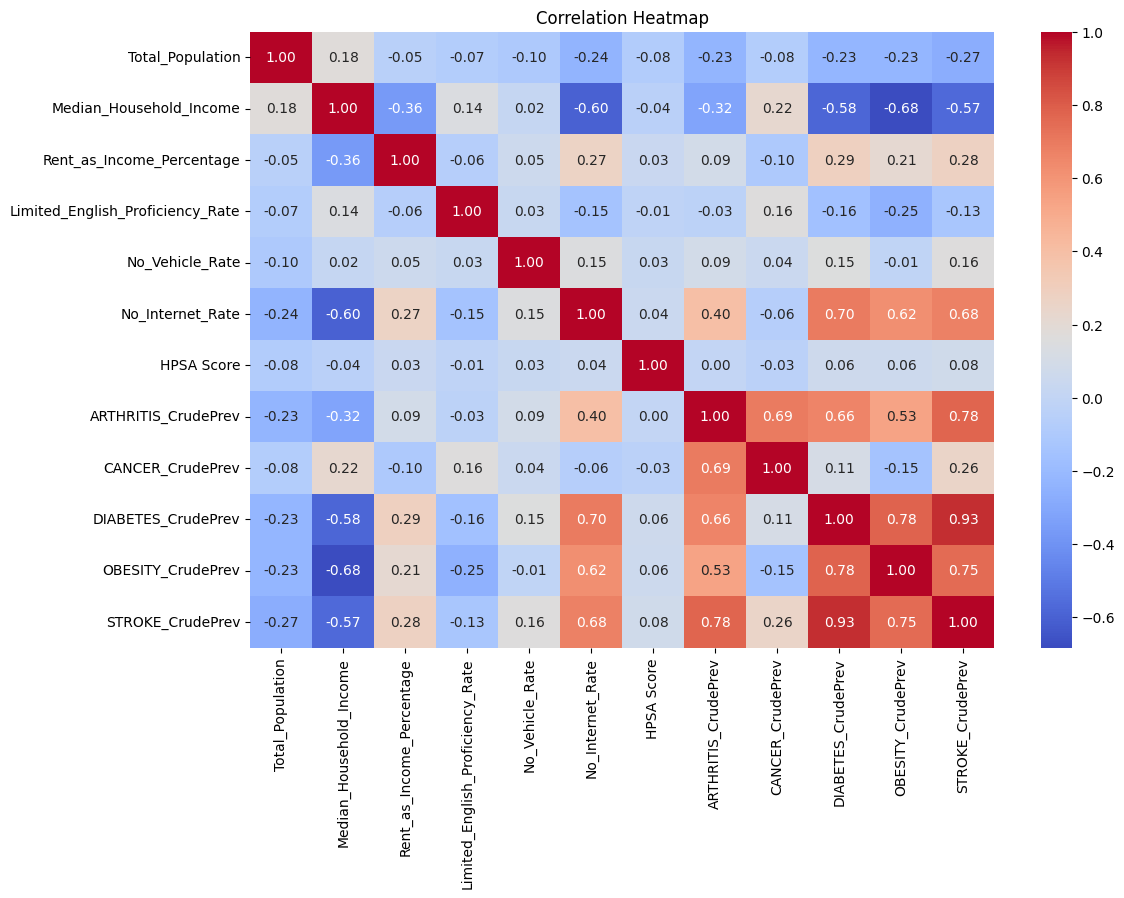

In [86]:
# Correlation analysis
columns_to_check = [
    'Total_Population', 
    'Median_Household_Income', 
    'Rent_as_Income_Percentage', 
    'Limited_English_Proficiency_Rate', 
    'No_Vehicle_Rate', 
    'No_Internet_Rate',
    'HPSA Score', 
    'ARTHRITIS_CrudePrev',
    'CANCER_CrudePrev',
    'DIABETES_CrudePrev', 
    'OBESITY_CrudePrev', 
    'STROKE_CrudePrev'
]

correlation_matrix = df_final[columns_to_check].corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()